## Atividade Radioproteção 

Lucas Rodrigues Lopes

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Baixando planlha para o código
exames = pd.read_excel("exames.xlsx")
exames.head()

,id,idade,sexo,altura,massa,CTDIvol,DLP,Pitch,Rotation time,kV,mAs
0,318,73,M,1.70,94.0,10.47,460.2,0.7,0.75,120,175
1,319,51,M,1.66,86.0,10.46,373.7,0.7,0.75,120,175
2,320,52,M,1.75,100.0,11.38,449.4,0.7,0.75,120,175
3,76,53,M,1.96,163.0,25.52,1226.9,0.7,0.75,120,175
4,77,61,M,1.67,82.0,9.09,333.0,0.7,0.75,120,175


,id,idade,sexo,altura,massa,CTDIvol,DLP,Pitch,Rotation time,kV,mAs,IMC,Situacao_Nutricional
0,318,73,M,1.70,94.0,10.47,460.2,0.7,0.75,120,175,32.525952,Obesidade
1,319,51,M,1.66,86.0,10.46,373.7,0.7,0.75,120,175,31.209174,Obesidade
2,320,52,M,1.75,100.0,11.38,449.4,0.7,0.75,120,175,32.653061,Obesidade
3,76,53,M,1.96,163.0,25.52,1226.9,0.7,0.75,120,175,42.430237,Obesidade
4,77,61,M,1.67,82.0,9.09,333.0,0.7,0.75,120,175,29.402273,Sobrepeso
...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,308,57,M,1.87,110.0,25.01,1007.5,0.7,0.75,120,175,31.456433,Obesidade
364,309,54,M,1.83,97.0,11.90,459.4,0.7,0.75,120,175,28.964735,Sobrepeso
365,317,56,M,1.71,101.0,14.84,547.1,0.7,0.75,120,175,34.540542,Obesidade
366,310,51,F,1.68,93.0,12.43,481.1,0.7,0.75,120,175,32.950680,Obesidade


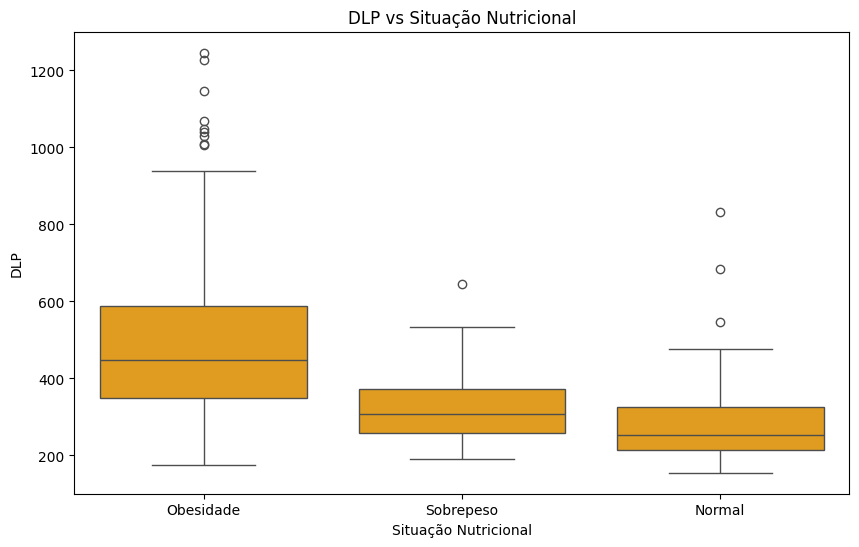

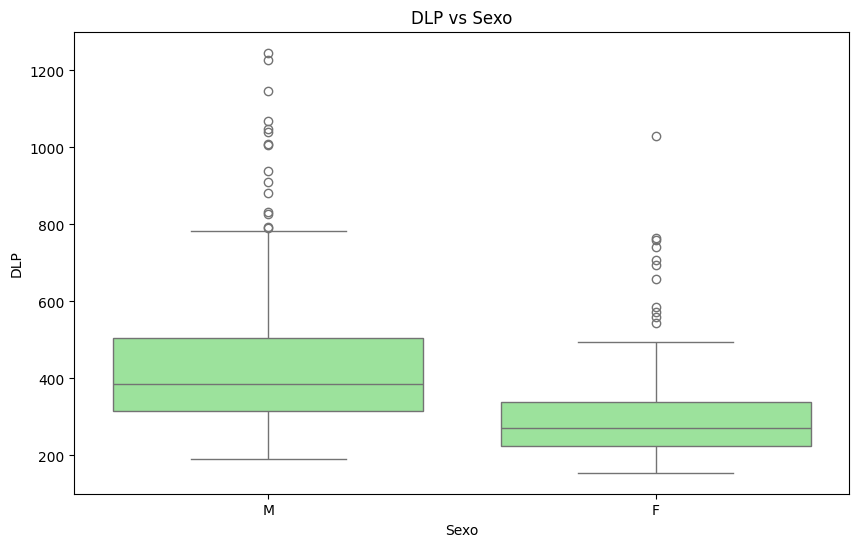

In [5]:
# IMC do paciente

exames["IMC"] = exames["massa"] / (exames["altura"]**2)
# display(exames)

# Classificar a situação nutricional com base no IMC
def classificar_situacao_nutricional(imc):
    if imc < 25:
        return 'Normal'
    elif 25 <= imc < 30:
        return 'Sobrepeso'
    else:
        return 'Obesidade'

exames['Situacao_Nutricional'] = exames['IMC'].apply(classificar_situacao_nutricional)
display(exames)

# Plotar o Boxplot do DLP em relação à Situação Nutricional
plt.figure(figsize=(10, 6))
sns.boxplot(x='Situacao_Nutricional', y='DLP', data=exames, color='orange')
plt.title('DLP vs Situação Nutricional')
plt.xlabel('Situação Nutricional')
plt.ylabel('DLP')
plt.show()

# Plotar o Boxplot do DLP em relação ao Sexo
plt.figure(figsize=(10, 6))
sns.boxplot(x='sexo', y='DLP', data=exames, color="lightgreen")
plt.title('DLP vs Sexo')
plt.xlabel('Sexo')
plt.ylabel('DLP')
plt.show()

In [13]:


# Dividir o DataFrame em grupos com base na situação nutricional
grupo_normal = exames[exames["Situacao_Nutricional"] == "Normal"]["DLP"]
grupo_sobrepeso = exames[exames["Situacao_Nutricional"] == "Sobrepeso"]["DLP"]
grupo_obesidade = exames[exames["Situacao_Nutricional"] == "Obesidade"]["DLP"]

# Realizar o teste ANOVA para situação nutricional
anova_resultado = stats.f_oneway(grupo_normal, grupo_sobrepeso, grupo_obesidade)
print("Resultado do Teste ANOVA para Situação Nutricional:")
print("Estatística F:", anova_resultado.statistic)
print("Valor p:", anova_resultado.pvalue)

# Dividir o DataFrame em grupos com base no sexo
grupo_masculino = exames[exames["sexo"] == "M"]["DLP"]
grupo_feminino = exames[exames["sexo"] == "F"]["DLP"]

# Realizar o teste t para o sexo
teste_t_resultado = stats.ttest_ind(grupo_masculino, grupo_feminino)
print("\nResultado do Teste t para Sexo:")
print("Estatística t:", teste_t_resultado.statistic)
print("Valor p:", teste_t_resultado.pvalue)
print("\n======================================================================\n")
print("Conclui-se que: O DLP varia significativamente com a situação nutricional.")
print("Existe uma diferença estatisticamente significativa no DLP entre homens e mulheres. \nIsso implica que o sexo do paciente tem um efeito significativo sobre o DLP dos exames de tomografia.")


Resultado do Teste ANOVA para Situação Nutricional:
Estatística F: 67.08658394093297
Valor p: 1.5402733842422753e-25

Resultado do Teste t para Sexo:
Estatística t: 6.560158468435312
Valor p: 1.836931461789536e-10


Conclui-se que: O DLP varia significativamente com a situação nutricional.
Existe uma diferença estatisticamente significativa no DLP entre homens e mulheres. 
Isso implica que o sexo do paciente tem um efeito significativo sobre o DLP dos exames de tomografia.
